In [5]:
#importing 
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)



In [7]:
df = pd.read_csv("data.csv",sep=";")

df['Target'] = pd.Categorical(df['Target'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   int64   
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

In [ ]:
from sklearn.decomposition import PCA

In [61]:
y = df["Target"]
X = df.loc[:,"Marital status":"GDP"]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:

#treinando o modelo



lr_model = LogisticRegression(max_iter=1000).fit(x_train_scaled, y_train)

In [65]:
#predicao

pred = lr_model.predict(x_test_scaled)

accuracy = accuracy_score(pred, y_test)
f1 = f1_score(pred, y_test, average = "weighted")

print("Acurácia: ", accuracy)
print("F1 Score: ", f1)
nomes_das_colunas = df.columns.tolist()
nomes_das_colunas.remove("Target")
nomes_das_colunas

Acurácia:  0.7688253012048193
F1 Score:  0.7812800431662639


['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [66]:
cm = confusion_matrix(y_test, pred)
#cm_df = pd.DataFrame(cm, index=nomes_das_colunas, columns=nomes_das_colunas)
#cm_df = pd.DataFrame(cm)
#sns.heatmap(cm_df, annot=True)

<AxesSubplot:>

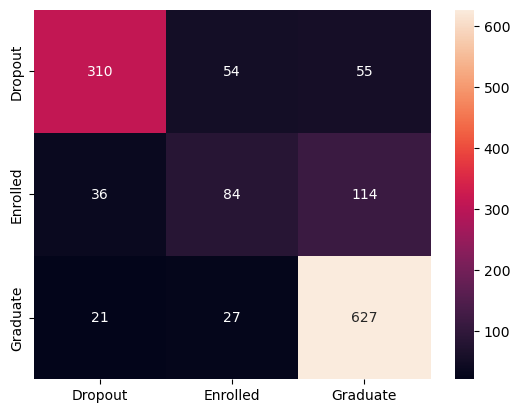

In [67]:


# Obter as classes únicas do y_test para usar como rótulos no heatmap
unique_classes = sorted(df["Target"].unique())

# Criar a matriz de confusão
cm = confusion_matrix(y_test, pred)

# Criar o DataFrame cm_df com os nomes das classes como rótulos
cm_df = pd.DataFrame(cm, index=unique_classes, columns=unique_classes)

# Criar o heatmap
sns.heatmap(cm_df, annot=True, fmt='d')
